<a href="https://colab.research.google.com/github/sarah-abukhotti/python_projects/blob/main/Dimonds_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# upload the dataset

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('diamonds.csv')

# Now we print the first few rows of the dataframe
print(df.head())


In [ ]:
 df.info()

the data is mostly numerical, and the first column does not affect the analysis since it's just line counting so we will remove it.

there's an unneeded line with no actual relevent values, so we remove it




In [ ]:
df = df.drop(['Unnamed: 0'],axis=1)

df.head()

see if there is any empty cells


In [ ]:
df.isnull().sum()


,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


 we get the summary of statistical information for numerical columns in the DataFrame


In [ ]:
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z,a_r_xy,a_r_xz,a__yz,a_r_yz
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,2.904228,3.405972,3.051502,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046,0.999425,1.619939,1.621133,1.621133
std,0.473795,1.116579,1.701272,1.647005,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530,0.011666,0.048718,0.058258,0.058258
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.137351,0.161006,0.161950,0.161950
25%,0.400000,2.000000,2.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,0.992625,1.598315,1.599432,1.599432
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.995745,1.615854,1.618750,1.618750
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000,1.006944,1.637681,1.640138,1.640138
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.615572,6.186916,7.307692,7.307692


 we have 0 values in x, y, z


In [ ]:
zero_count_x = df['x'].value_counts().get(0, 0)
print(f"Number of zeros in x: {zero_count_x}")
zero_count_y = df['y'].value_counts().get(0, 0)
print(f"Number of zeros in y: {zero_count_y}")
zero_count_z = df['z'].value_counts().get(0, 0)
print(f"Number of zeros in z: {zero_count_z}")

Number of zeros in x: 0
Number of zeros in y: 0
Number of zeros in z: 0


since the number of 0 in the columns is small  its not really important and won't affect the data negativaly to remove them


In [ ]:
df=df.drop(df[df["x"]==0].index)
df=df.drop(df[df["y"]==0].index)
df=df.drop(df[df["z"]==0].index)

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,a_r_xy,a_r_xz,a__yz,a_r_yz
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43,0.992462,1.625514,1.637860,1.637860
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31,1.013021,1.683983,1.662338,1.662338
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31,0.995086,1.753247,1.761905,1.761905
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63,0.992908,1.596958,1.608365,1.608365
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75,0.997701,1.578182,1.581818,1.581818


In [ ]:
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z,a_r_xy,a_r_xz,a__yz,a_r_yz
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,2.904228,3.405972,3.051502,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046,0.999425,1.619939,1.621133,1.621133
std,0.473795,1.116579,1.701272,1.647005,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530,0.011666,0.048718,0.058258,0.058258
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.137351,0.161006,0.161950,0.161950
25%,0.400000,2.000000,2.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,0.992625,1.598315,1.599432,1.599432
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.995745,1.615854,1.618750,1.618750
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000,1.006944,1.637681,1.640138,1.640138
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.615572,6.186916,7.307692,7.307692


creating a plot that difines the relationship between 2 catagories at a time


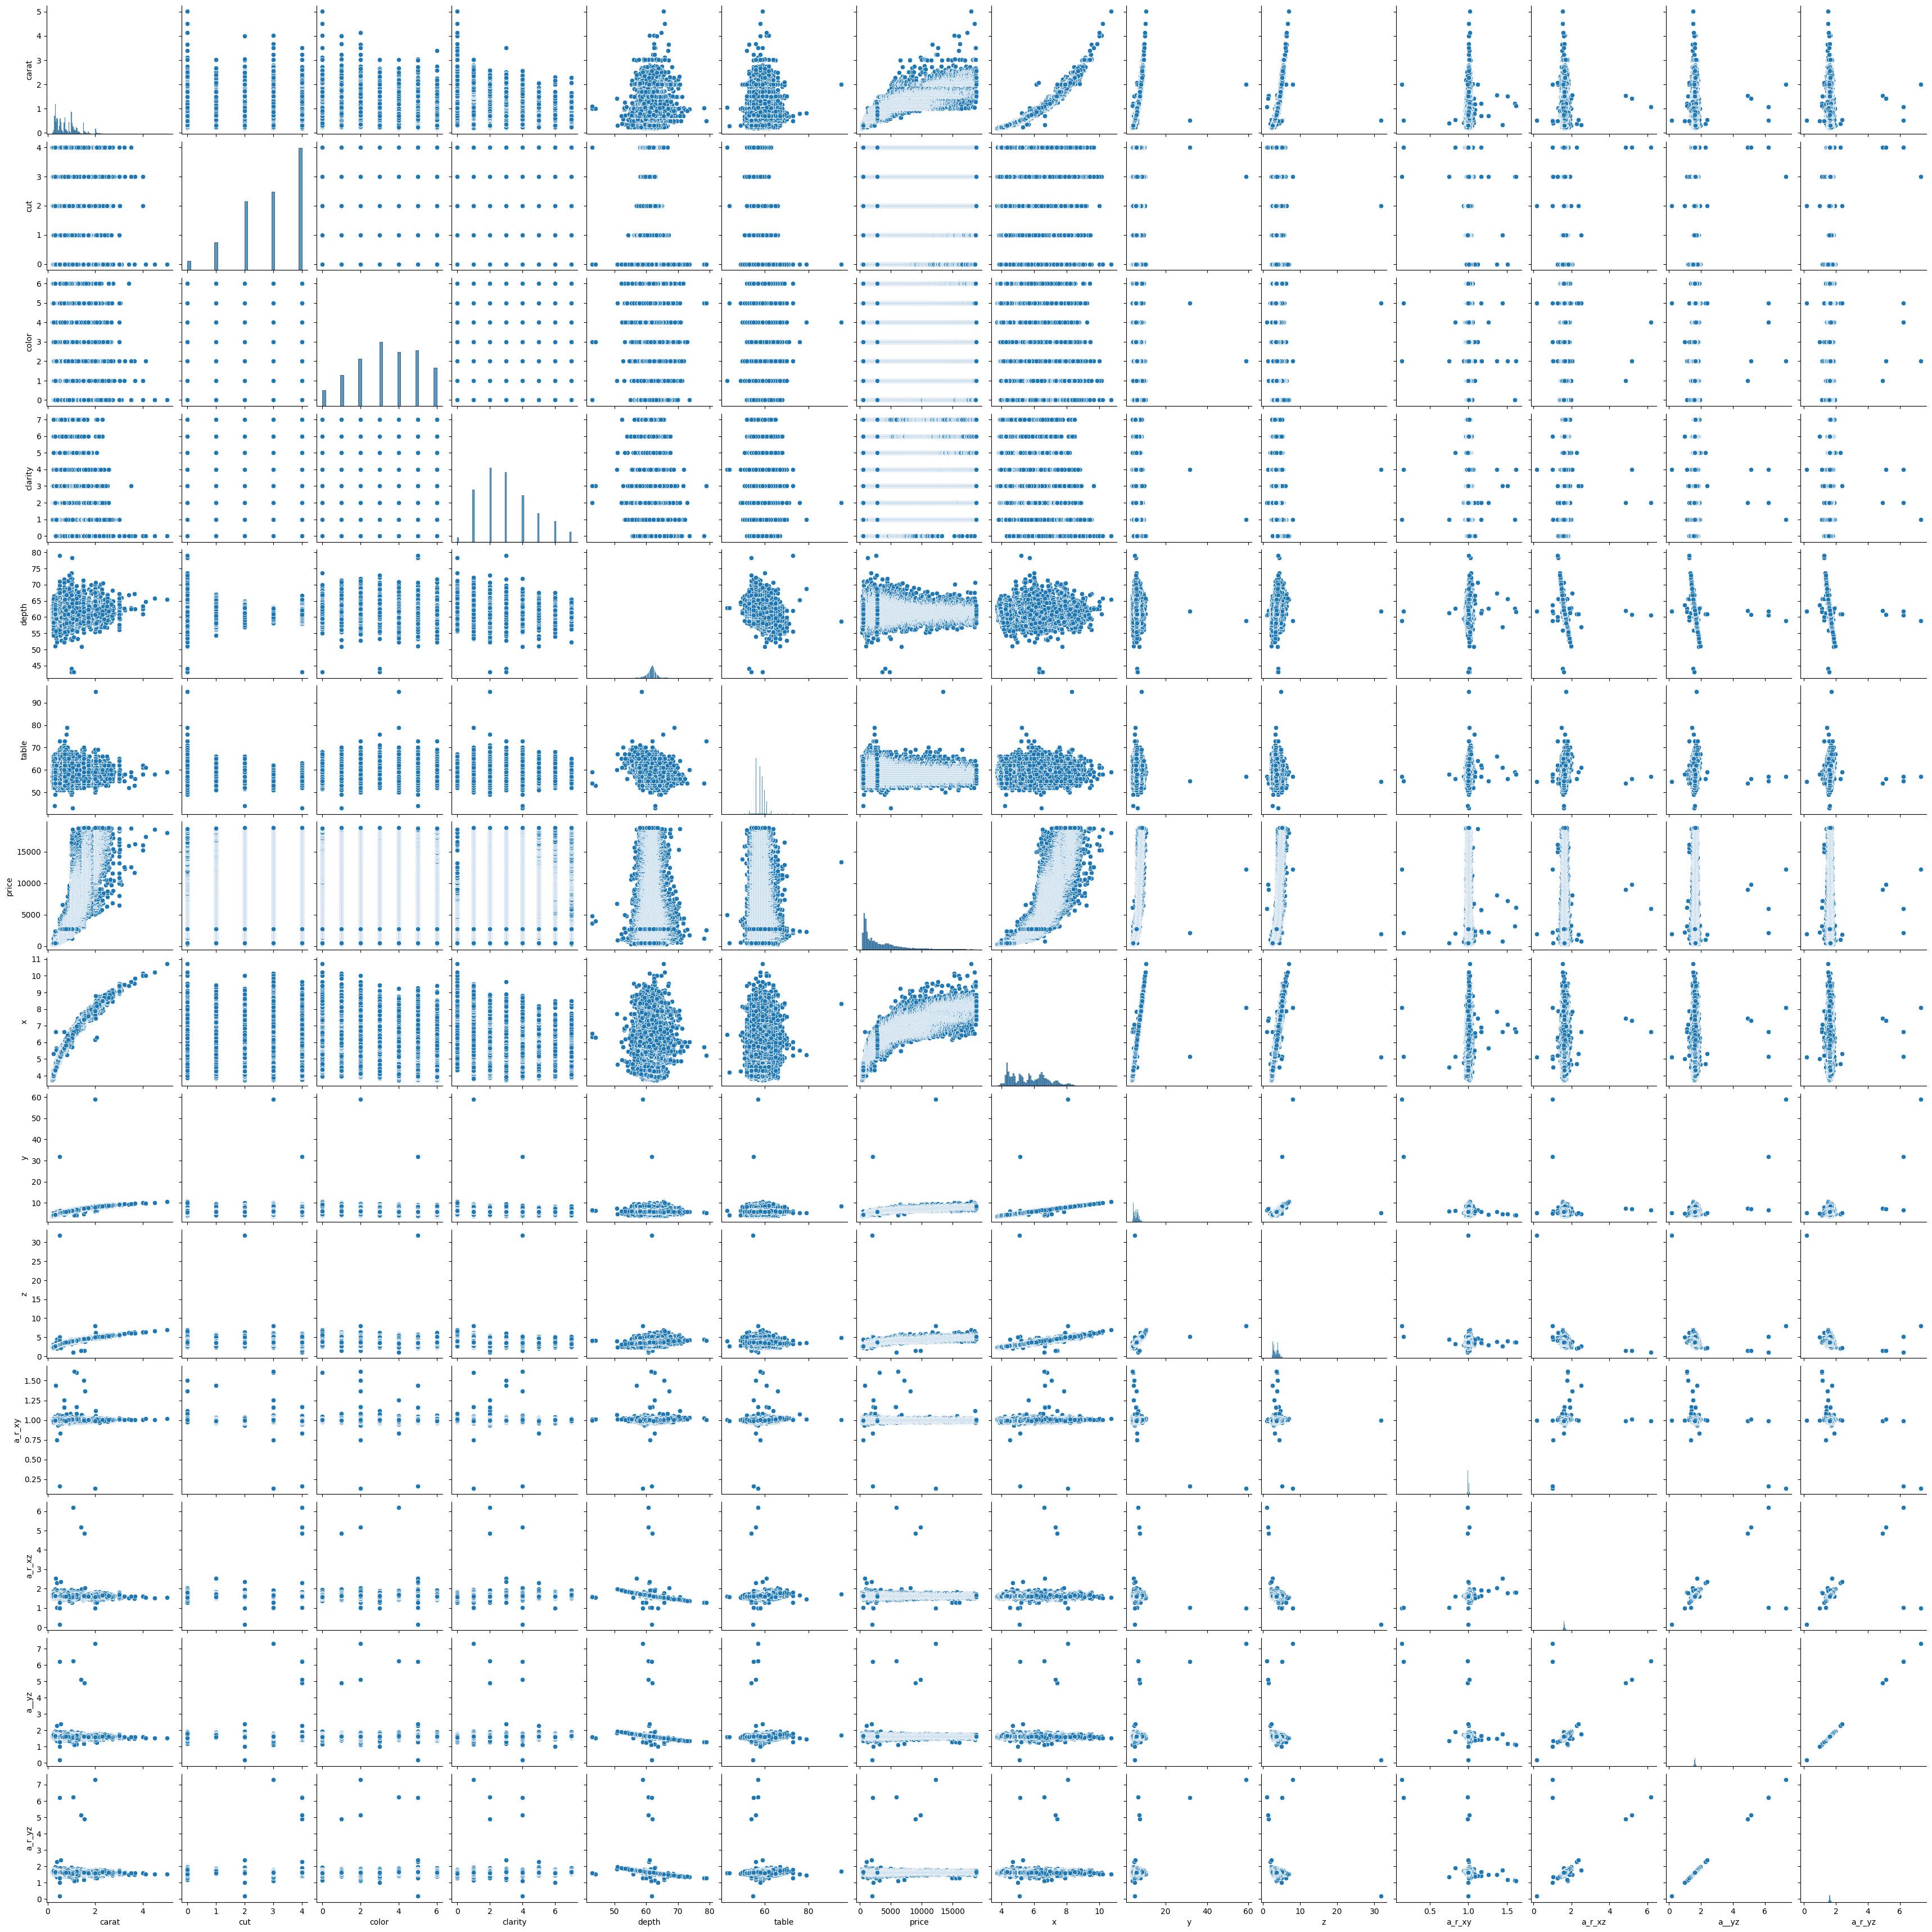

In [55]:
sns.pairplot(df)

In [56]:
# in the depth catagory we can see that the data is focused in between 50 and 75
df=df[(df["depth"]>49)&(df["depth"]<76)]
# in the table catagory we can see the data between maybe 45 and 80
df=df[(df["table"]>44)&(df["table"]<81)]
# since x has a small range I didn't thunk I would need to care about the outlier there
# since in y we have 2 outliers above 30 and 60 while all the other points are under 10, in x
df=df[(df["y"])<30]
# since the outlier in z is one point above 30 I think i can use any number bigger than the biggest point except the outlier
df=df[(df["z"]<12)]

we can find the data number of row * columns to understand what we are working with if needed or to check what changes we made

In [57]:
df.shape

(53908, 14)

we can represent catagorical data using bar plot as long as the catagories subcatagories are not big in number for better representation and clarity.

In [58]:
sns.countplot(x='cut',df=df)

ValueError: Could not interpret value `cut` for `x`. Value is a string, but `data` was not passed.

In [ ]:
sns.countplot(x="clarity",df=df)

In [ ]:
sns.countplot(x="color",df=df)

for analysis we can transform catagorical data into numerical values, by counting the number of repeatetion of the values

In [ ]:
cut_mapping = {'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4}
df['cut'] = df['cut'].replace(cut_mapping)

In [ ]:
clarity_mapping ={'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7}
df['clarity'] = df['clarity'].replace(clarity_mapping)

In [ ]:
color_mapping={'D':6,'E':5,'F':4,'G':3,'H':2,'I':1,'J':0}
df['color']=df['color'].replace(color_mapping)

In [ ]:
df_corr = df.copy()

# Create a correlation matrix
corr = df_corr.corr()

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Diamonds Correlation Matrix')
plt.show()

by analysing this correlation matrix we can assume:
- the relationship between the carat and cut is a moderate  negative correlation
- the relationship between the carat and color is a moderate  negative correlation
- the relationship between the carate and clarity is a moderate  negative correlation
- the relationship between the carate and price is a strong positive correlation

dimensions:
- the relationship between the carate and depth is a moderate  negative correlation (meaning shallowers cuts are more desirable)
- the relationship between the carate and table is a moderate  negative correlation
- the relationship between the carate and x is a strong positive correlation
- the relationship between the carate and y is a strong positive correlation
- the relationship between the carate and z is a strong positive correlation